# House Price Regression

### Em problemas de regressão, talvez seja interessante fazer transformações em nosso target.

### Juntar os dados de treino com teste em competições kaggle, é uma boa estratégia para eliminar valores nulos e estabelecer melhores médias.

# Objetivos

- Clean the data
- Feature Engineering
- Feature Transformation
- Enconding
- Scaling
- Target transformation
- Model Selection
- Hyperparameter optimization
- Ensembling
- Feature Selection

In [141]:
import pandas as pd 
import numpy as np
# Essas opções permitem que não haja limitação no display de colunas e de linhas no pandas.
# pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)

In [237]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

Combinando train e test.

In [177]:
target = train_data['SalePrice']
test_ids = test_data['Id']

train1 = train_data.drop(['Id', 'SalePrice'], axis=1)
test1 = test_data.drop('Id', axis=1)

all_data = pd.concat([train1, test1]).reset_index(drop=True)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Assegurar tipos de dados próprios.

Pode ser que uma coluna ou outra seja definida como numérica, mas no final das contas ela é de natureza categórica.

### Juntamente com a análise do "data_description.txt" observamos que a coluna MSSubClass é numérica e originalmente era para ser considerada como categórica.

In [178]:
all_data2 = all_data.copy()
all_data2['MSSubClass'] = all_data2['MSSubClass'].astype(str)

### Preenchendo os valores nulos das colunas categóricas.

### Podemos preencher de duas formas:
- Transformando os valores nulos em uma categoria da coluna.
- Usando a moda da coluna.

No primeiro caso, ocorre quando a descrição dos dados específica que o valor nulo tem significado no dataset.

O segundo ocorre apenas quando o primeiro caso não ocorre.

In [179]:
# Usando um valor constante.
for column in [
    'Alley',
    'BsmtQual', 
    'BsmtCond', 
    'BsmtExposure', 
    'BsmtFinType1', 
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
    ]:
    all_data2[column] = all_data2[column].fillna('None')

# Usando o valor da moda.
for column in [
    'MSZoning', 
    'Utilities', 
    'Exterior1st', 
    'Exterior2nd', 
    'MasVnrType', 
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
    ]:
    all_data2[column] = all_data2[column].fillna(all_data2[column].mode()[0])

In [180]:
#all_data2.select_dtypes('object').loc[:, all_data2.isnull().sum() > 0].columns

In [181]:
#Sem valores nulos em variáveis categóricas.
all_data2.select_dtypes('object').isnull().sum().sum()

0

In [182]:
#Ainda tem valores nulos nos numéricos.
all_data2.select_dtypes(np.number).isnull().sum().sum()

678

# Preenchendo os valores nulos das colunas numéricas.

In [183]:
data3 = all_data2.copy()

### Podemos preencher os valores nulos numéricos usando a média. É perfeitamente aceitável, mas um jeito mais inteligente seria utilizar KNN para imputar o melhor valor para a variável nula.

In [184]:
from sklearn.neighbors import KNeighborsRegressor

data3.select_dtypes(np.number).isna().sum()

LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [185]:
# Esse comando gera todos os missing values de uma coluna.

data3.loc[data3['LotFrontage'].isna() == True, 'LotFrontage']

#Alternativamente, esse comando gera os que não são nulos.

data3.loc[data3['LotFrontage'].isna() == False, 'LotFrontage']


0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2433, dtype: float64

In [186]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    
    #Values for imputation
    #Using df because it modifies the actual dataframe 
    #Filling the nan with the predictions
    df.loc[df[na_target].isna() == True, na_target] = y_pred

    return df

In [187]:
data3.columns[data3.isna().sum() != 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [188]:
for col in ['LotFrontage', 
            'MasVnrArea', 
            'BsmtFinSF1', 
            'BsmtFinSF2', 
            'BsmtUnfSF',
            'TotalBsmtSF', 
            'BsmtFullBath', 
            'BsmtHalfBath', 
            'GarageYrBlt',
            'GarageCars', 
            'GarageArea']:
    data3 = knn_impute(data3, col)


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f3a1b7cf9a0>
Traceback (most recent call last):
  File "/home/mardin/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/mardin/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/mardin/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/mardin/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

In [189]:
data3.isna().sum().sum()

0

In [190]:
data4 = data3.copy()

# Feature Transformations

### Alguns modelos performam melhor quando os dados estão distribuídos de forma normal. Mas você não pode garantir uma distribuição normal para cada feature.
### Uma coisa que se pode fazer é observar a assimetria da coluna.

In [191]:
import scipy.stats

data4.select_dtypes(np.number)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [192]:
numeric_columns = data4.select_dtypes(np.number).columns

In [193]:
scipy.stats.skew(data4['LotFrontage'])

1.3407511399227516

- 0, siginifca que não há assimetria, está perfeitamente distribuído.
- positivo, significa que está com uma inclinação para a direita.
- negativo, significa que está com uma inclinação para a esquerda.

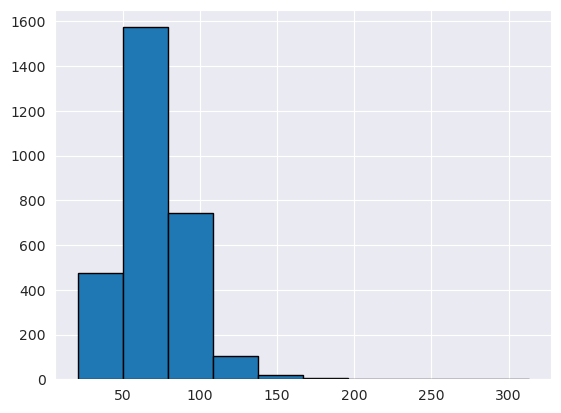

In [194]:
import matplotlib.pyplot as plt

plt.hist(data4['LotFrontage'], edgecolor='black')
plt.show()

#### Observa-se que a distribuição da variável "LotFrontage" está realmente com uma inclinação para a direita.

1.3407511399227516


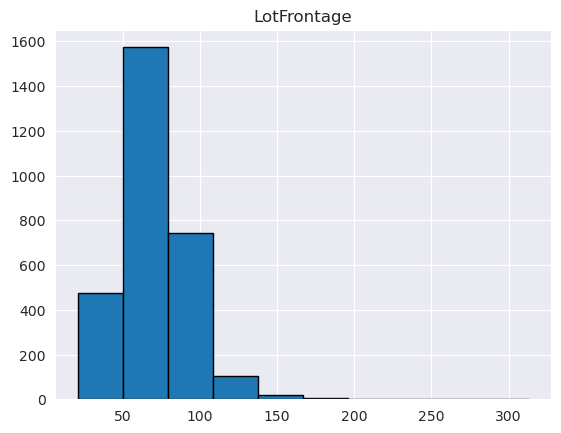

12.822431401556724


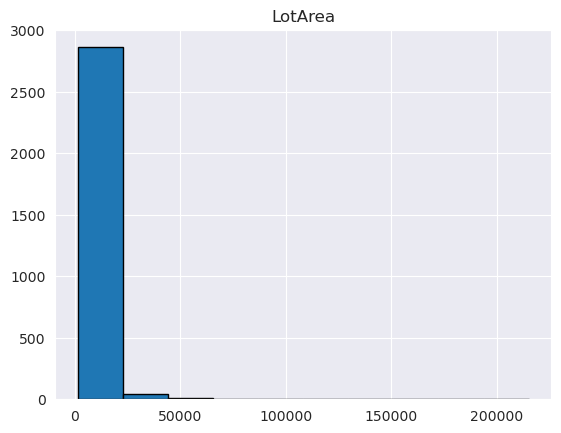

0.19711044867062352


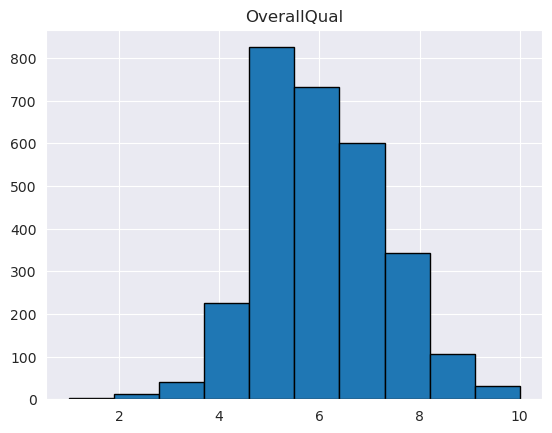

0.5703120502855311


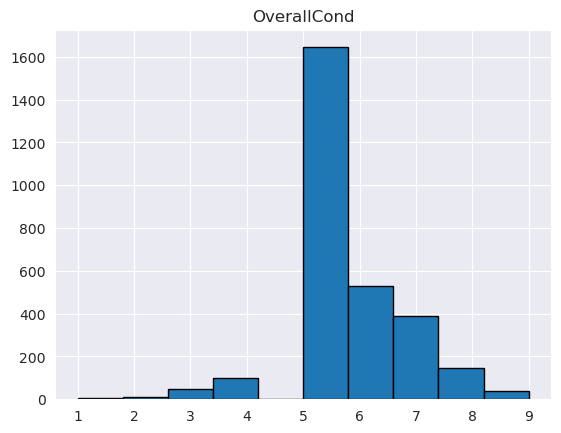

-0.5998055475020266


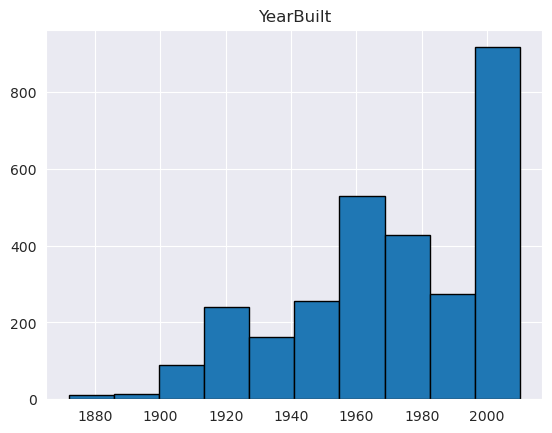

-0.4510203770788569


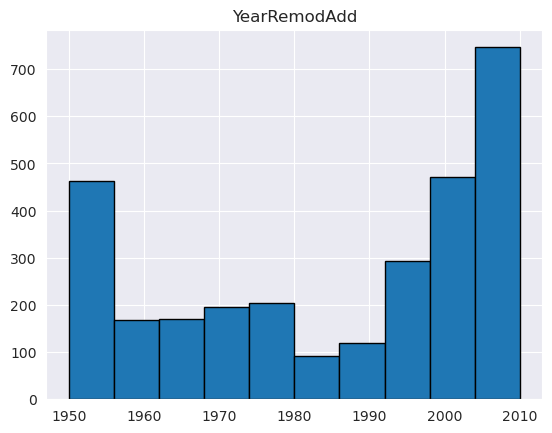

2.6036815228598025


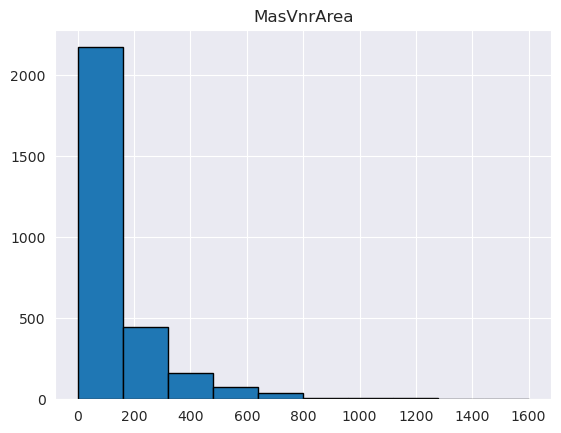

1.42551624408992


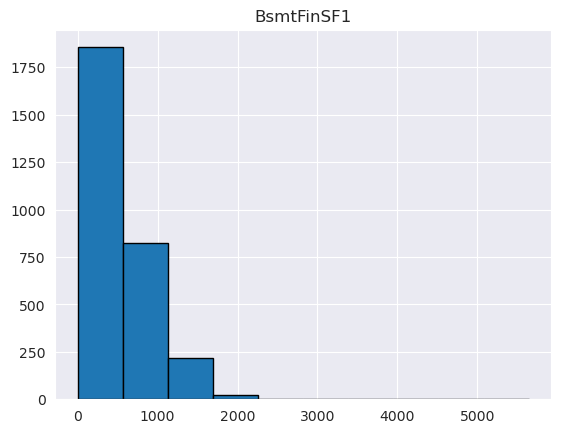

4.146110709722618


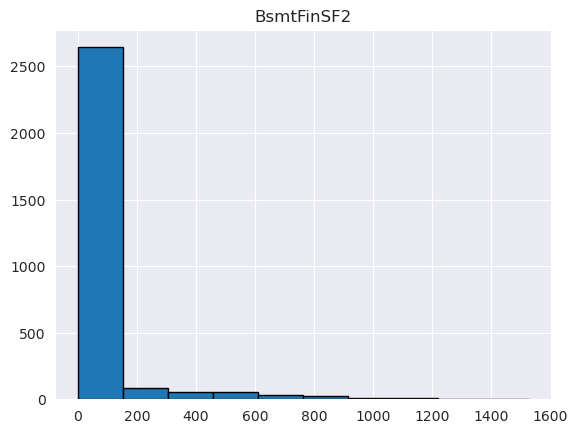

0.9193218092272986


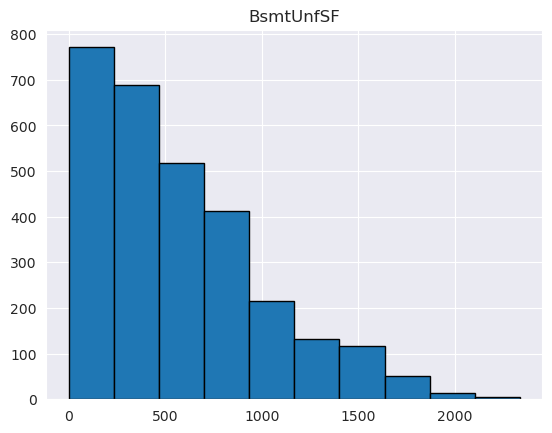

1.1628058362558633


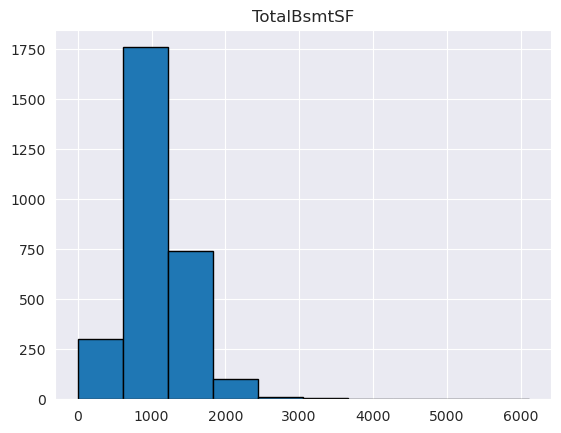

1.4696044169256821


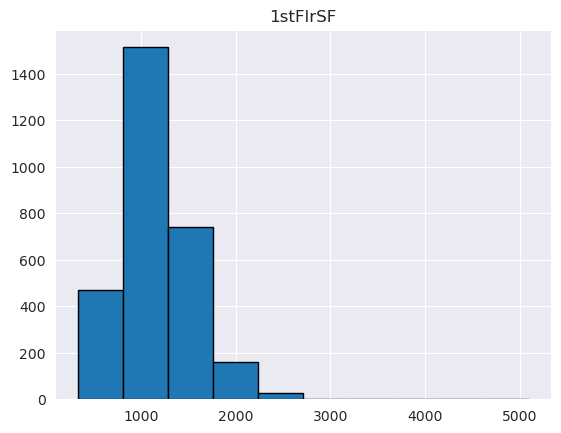

0.8616747488436027


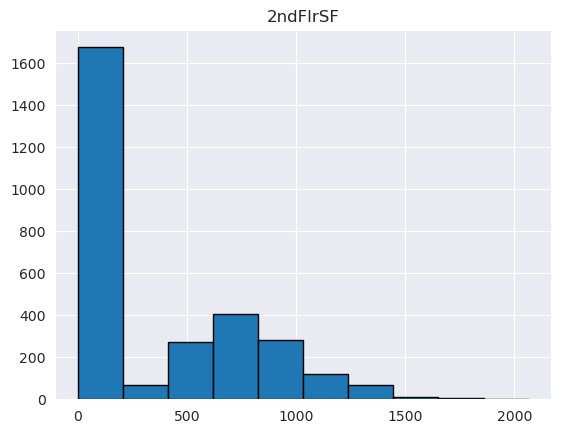

12.088761003370664


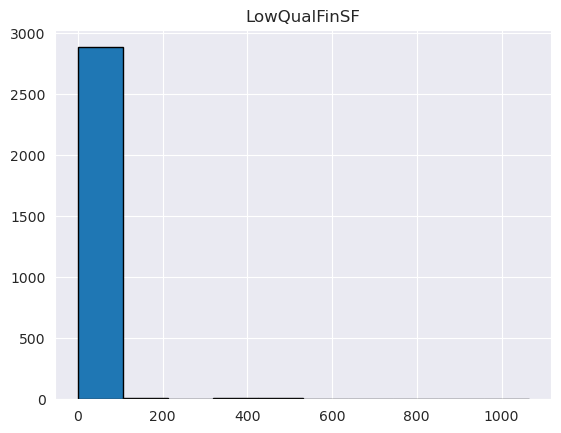

1.269357688230336


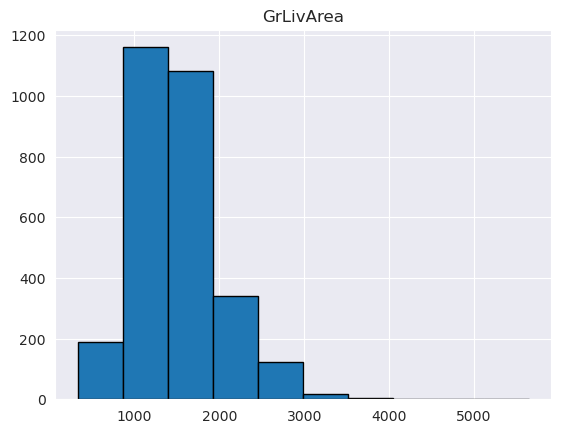

0.6243725711574646


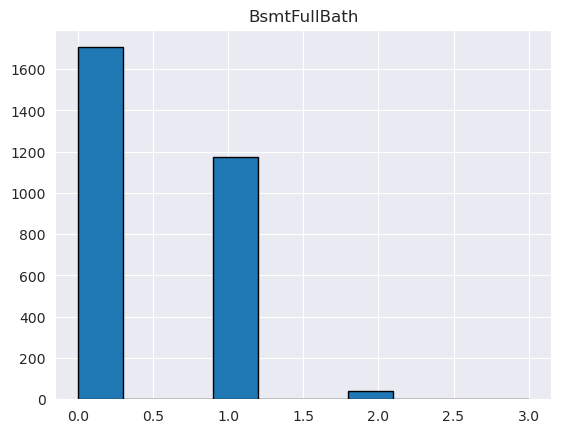

3.9315938391525584


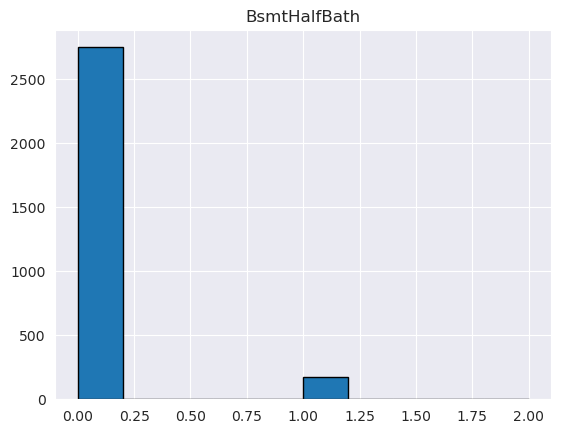

0.16760573326550954


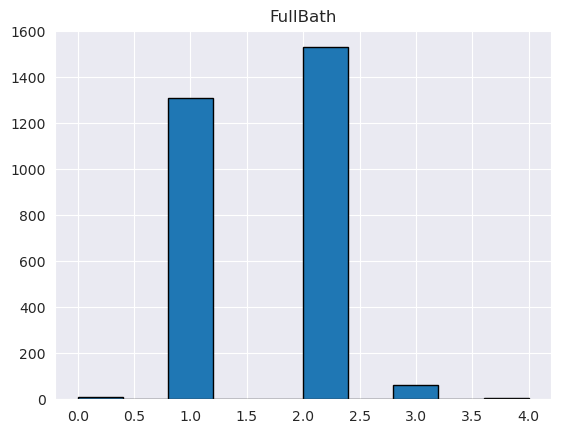

0.6945664946629632


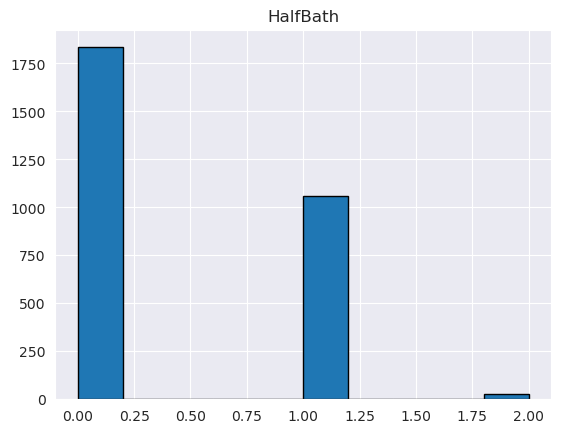

0.3263243492888351


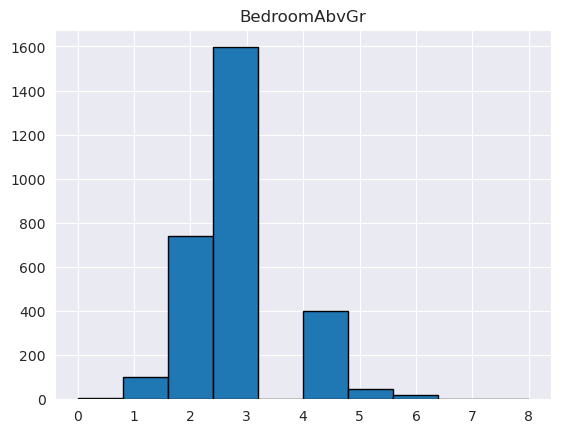

4.302254369609591


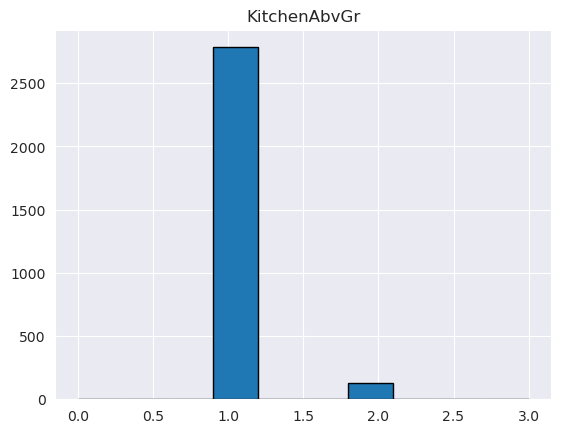

0.7583669060998621


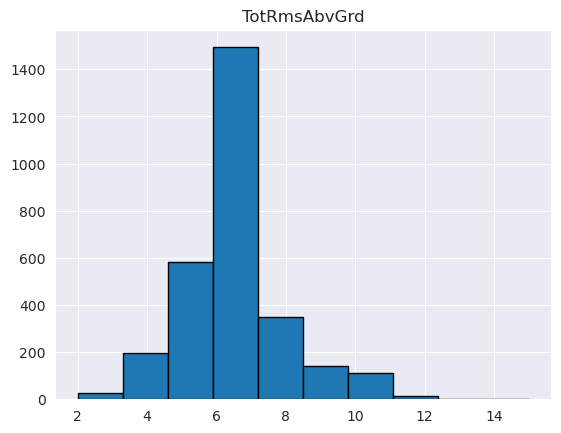

0.7334945989608231


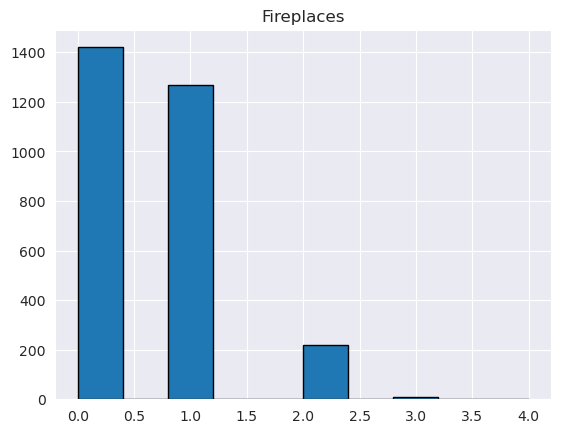

-0.34632693555491073


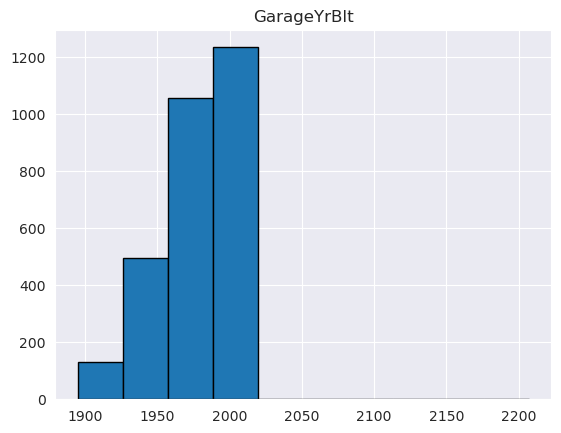

-0.21859251785229397


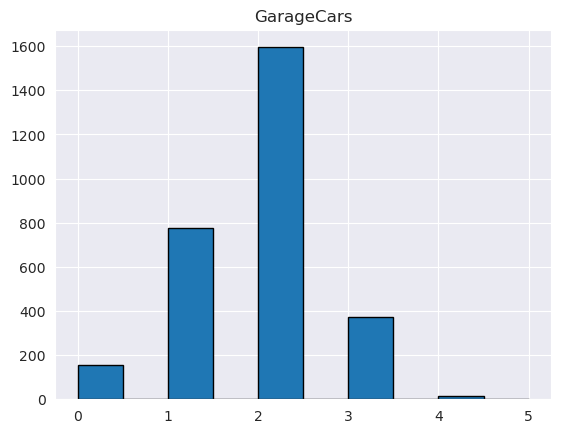

0.2408957265206424


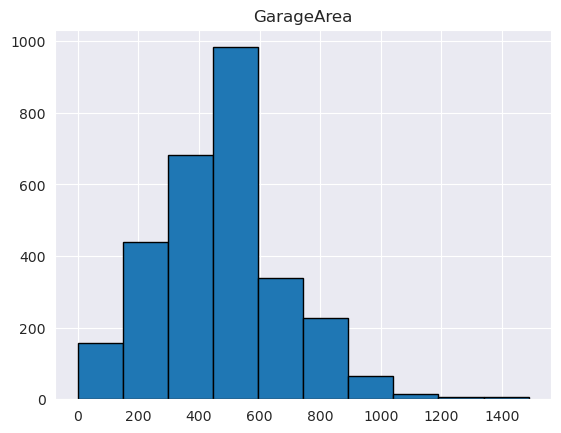

1.8424328111184782


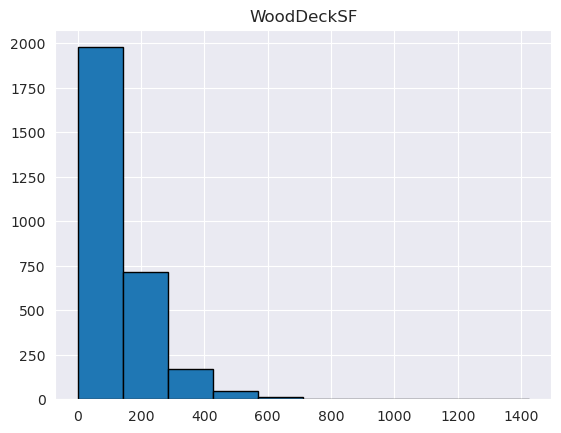

2.5351137294802557


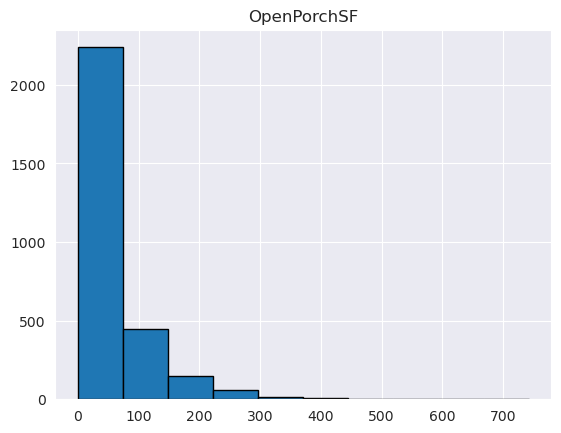

4.003891220540856


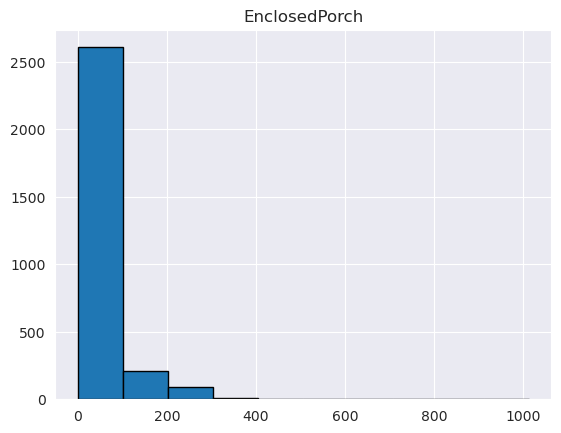

11.376064682827481


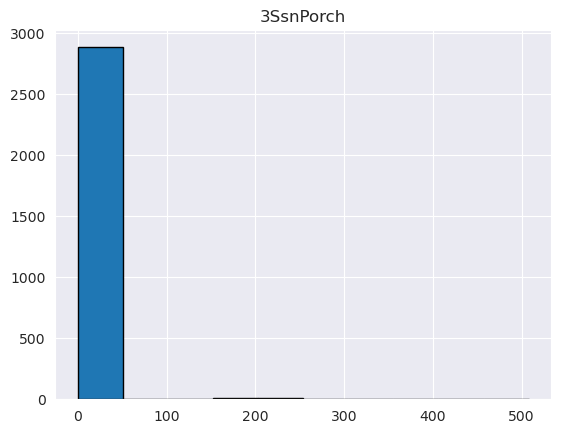

3.9466937029936977


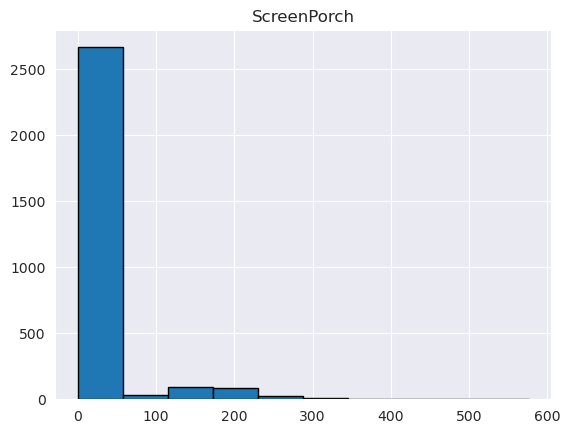

16.89832791614449


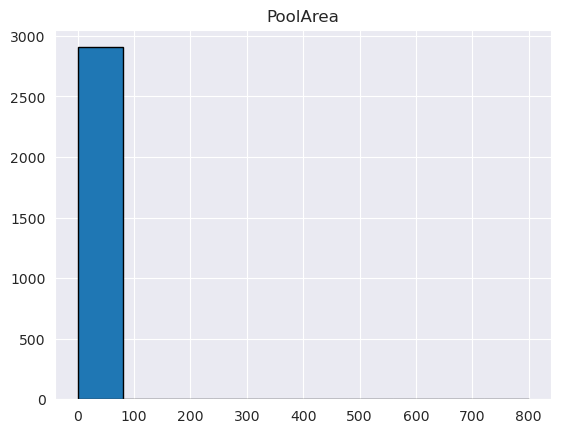

21.9471948077491


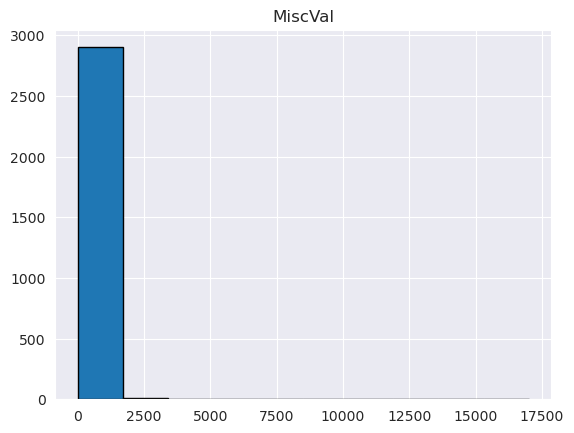

0.19588394306360818


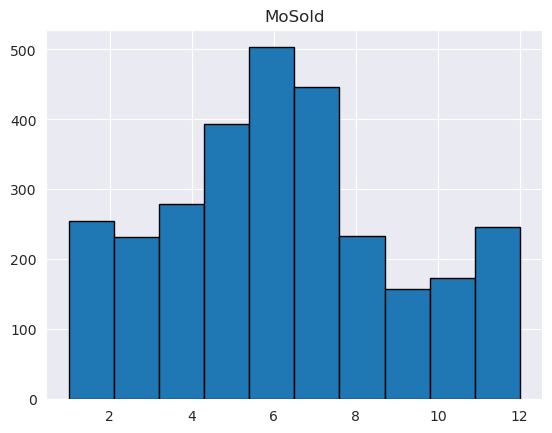

0.13239881459168024


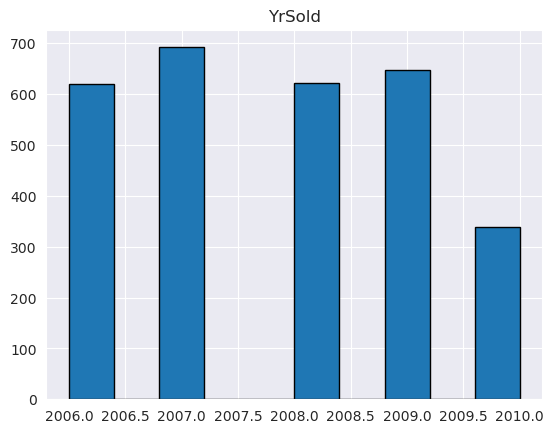

In [195]:
for col in numeric_columns:
    print(scipy.stats.skew(data4[col]))
    plt.hist(data4[col], edgecolor='black')
    plt.title(col)
    plt.show()

# Outra método de resolução seria...

In [196]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
# Não importa qual a direção da inclinação. O que importa é apenas o valor.
skew_df['Abs_Skew'] = skew_df['Skew'].apply(lambda skew: abs(skew))
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


# Podemos normalizar a distribuição das colunas usando log, mas com isso temos um problema. O logaritmo não é definido no número zero, então para cobrir esse caso, adiciona-se um para que o valor zero seja definido.

In [197]:
skewed_columns = skew_df.query("Skewed == True")['Feature'].values

In [198]:
for col in skewed_columns:
    data4[col] = np.log(data4[col]+1)

In [199]:
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


#### A normalização por logaritmo não resolve completamente a assimetria da feature, porém uma aplicação já é o suficiente.

#### Olhando a coluna "MoSold" percebemos um aspecto interessante nela.

In [200]:
data4['MoSold'].values

array([ 2,  5,  9, ...,  9,  7, 11])

# Consine Transform for Cyclical Features

#### Seus valores são de meses do ano, porém para o modelo, os valores não dão a enteder realmente seu sentido. Por exemplo, para o modelo, a distância entre o valor 12 e 1 é muito maior do que a distância entre o valor 1 e 6, mas como um ano é um ciclo, na realidade 1 e 12 estão bem mais próximos que 1 e 6.

#### Para resolver tal problema, podemos aplicar uma função cosseno na coluna de forma que o ciclo comece no 1 e termine no 12. Imagine que o 1 seria o zero, e o 12 seria o 2pi, no círculo trigonométrico.

#### Assim, usando uma ferramenta como Desmos, podemos criar uma função a qual começa no 1 e termine seu ciclo exatamente no 12. Isso, modificando apenas um valor constante.
### Resultamos na função cos(0,5236x)

In [201]:
data4['MoSold'] = (-np.cos(0.5236 * data4['MoSold']))
data4['MoSold'].values

array([-4.99997879e-01,  8.66028465e-01, -1.10196153e-05, ...,
       -1.10196153e-05,  8.66021118e-01, -8.66032138e-01])

In [202]:
data5 = data4.copy()

# Encode Categoricals

In [203]:
data5 = pd.get_dummies(data5)

In [204]:
data6 = data5.copy()

# Scaling

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data6)

# Returns a numpy array
# É importante voltar a ser um dataframe
data6 = pd.DataFrame(scaler.transform(data6), index=data6.index, columns=data6.columns)

# Target Transformation

#### É importante ter cuidado transformando o target, já que você está mudando a unidade dele e então se você quiser analisar suas predições, você deve desfazer as transformações.

/tmp/ipykernel_7233/3869669866.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, fit=scipy.stats.norm)
/tmp/ipykernel_7233/3869669866.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target), fit=scipy.stats.norm)


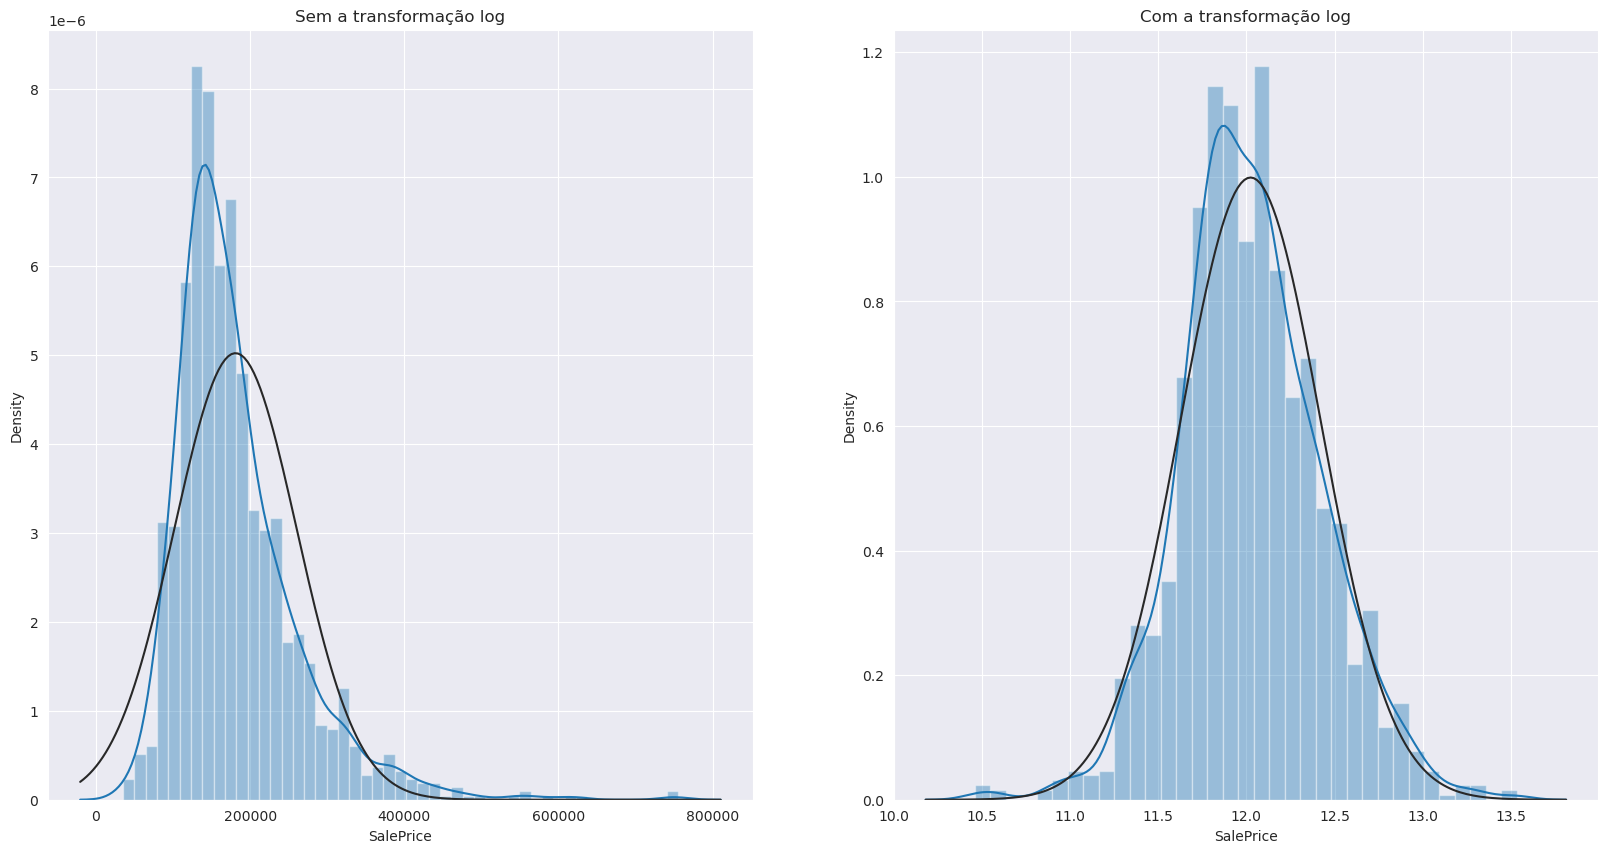

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.distplot(target, fit=scipy.stats.norm)
plt.title('Sem a transformação log')

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), fit=scipy.stats.norm)
plt.title('Com a transformação log')
#Como o minimo do target é maior que zero, garantimos que não há zeros e então podemos utilizar a normalização logaritmica sem adicionar 1.

plt.show()

#### Modelos geralmente preferem valores de maneira mais normal.

In [207]:
log_target = np.log(target)

#### Se quisermos voltar para a unidade padrão, deve-se aplicar exponencial.

In [208]:
#np.exp(log_target)-1, caso seja log+1
np.exp(log_target)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

# Separando dados de treino dos dados de teste.

In [225]:
train_final = data6.loc[:train_data.index.max(), :].copy()

In [221]:
test_final = data6.loc[train_data.index.max()+1 :, :].reset_index(drop=True).copy()

# Model Selection

In [231]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

rf = RandomForestRegressor(random_state=0, n_estimators=500)
rf.fit(train_final, log_target) 

kf = KFold(n_splits=10)
results = cross_val_score(rf, train_final, log_target, cv=kf, scoring='neg_root_mean_squared_error')


In [232]:
-results.mean()

0.13958105674924393

In [236]:
final_predictions = np.exp(rf.predict(test_final))
final_predictions

array([127618.63469406, 154111.71183622, 176544.8227284 , ...,
       154581.93882825, 113370.05844804, 229398.97700169])

In [239]:
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": final_predictions
})

,Id,SalePrice
0,1461,127618.634694
1,1462,154111.711836
2,1463,176544.822728
3,1464,181727.915135
4,1465,197895.669218
...,...,...
1454,2915,83388.118541
1455,2916,85157.141215
1456,2917,154581.938828
1457,2918,113370.058448


In [240]:
submission.to_csv('great_sub.csv', index=False, header=True)